In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [3]:
a2 = "Business_ModeloRecomendacion.csv"

In [4]:
Business = pd.read_csv(a2)

In [5]:
Business.head()

,business_id,name,address,latitude,longitude,stars,review_count,state
0,0x89c6c63c8cd87141:0x54d0d283872eecbb,Kater Street Bicycle,"Kater Street Bicycle, 609 S 16th St, Philadelp...",39.943673,-75.168762,4.9,15,PA
1,0x89c6c715d1821fe3:0x9cfa8308c0ce2289,Cadence Cycling and Cafe - Center City,"Cadence Cycling and Cafe - Center City, 201 S ...",39.950078,-75.180729,4.8,38,PA
2,0x89c6b0839da68acb:0xdefc7bf5c5a05cdc,Glenside Bible Church,"Glenside Bible Church, 447 N Keswick Ave, Glen...",40.110587,-75.149630,4.7,14,PA
3,0x89ce2ea137df5db7:0xab89dd7b3d947ac,Wellsboro Building Supply,"Wellsboro Building Supply, 45 Charleston St, W...",41.750531,-77.290827,4.6,28,PA
4,0x89ce2c1c3c5426df:0x1e132faacfd8005b,Charleston Street Recreation Area,"Charleston Street Recreation Area, 91 Charlest...",41.749456,-77.281806,4.6,14,PA


In [6]:
Business.tail(5)

,business_id,name,address,latitude,longitude,stars,review_count,state
102685,x_2IrYgFiQn7GOTTgWRbAw,The Vac & Sew Center,"200 Haddonfield Berlin Rd, Ste 5",39.857700,-74.987230,4.0,5,PA
102686,fn3ybdsRSrIDpKZTsRuAWg,INSPcenter/Thai Clinical Massage,"2625 N Meridian St, Unit 50",39.805057,-86.155975,4.0,12,IN
102687,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,39.856185,-75.427725,4.5,14,PA
102688,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,53.468419,-113.492054,3.0,13,IN
102689,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,27.771002,-82.394910,4.5,9,TN


In [7]:
Business_co = Business.drop(['address', 'name', 'latitude', 'longitude'], axis=1)

In [8]:
Business_co

,business_id,stars,review_count,state
0,0x89c6c63c8cd87141:0x54d0d283872eecbb,4.9,15,PA
1,0x89c6c715d1821fe3:0x9cfa8308c0ce2289,4.8,38,PA
2,0x89c6b0839da68acb:0xdefc7bf5c5a05cdc,4.7,14,PA
3,0x89ce2ea137df5db7:0xab89dd7b3d947ac,4.6,28,PA
4,0x89ce2c1c3c5426df:0x1e132faacfd8005b,4.6,14,PA
...,...,...,...,...
102685,x_2IrYgFiQn7GOTTgWRbAw,4.0,5,PA
102686,fn3ybdsRSrIDpKZTsRuAWg,4.0,12,IN
102687,2O2K6SXPWv56amqxCECd4w,4.5,14,PA
102688,IUQopTMmYQG-qRtBk-8QnA,3.0,13,IN


Se ha añadido la columna 'Ingresos por negocio' para cada estado, basándose en datos recolectados por el Departamento del Censo de Estados Unidos. Cada estado tiene un rango específico de ingresos previstos para los negocios

In [9]:
# Función para generar ingresos según el estado
def generar_ingresos(row):
    if row['state'] == 'MO':
        return np.random.randint(100, 301)
    elif row['state'] == 'TN':
        return np.random.randint(301, 601)
    elif row['state'] == 'PA':
        return np.random.randint(500, 1001)
    elif row['state'] == 'IN':
        return np.random.randint(200, 501)
    else:
        return None  # Manejo para otros estados según sea necesario

# Aplicar la función a cada fila del DataFrame
Business_co['ingresos por negocio'] = Business.apply(generar_ingresos, axis=1)

In [10]:
Business_co

,business_id,stars,review_count,state,ingresos por negocio
0,0x89c6c63c8cd87141:0x54d0d283872eecbb,4.9,15,PA,821.0
1,0x89c6c715d1821fe3:0x9cfa8308c0ce2289,4.8,38,PA,823.0
2,0x89c6b0839da68acb:0xdefc7bf5c5a05cdc,4.7,14,PA,950.0
3,0x89ce2ea137df5db7:0xab89dd7b3d947ac,4.6,28,PA,784.0
4,0x89ce2c1c3c5426df:0x1e132faacfd8005b,4.6,14,PA,811.0
...,...,...,...,...,...
102685,x_2IrYgFiQn7GOTTgWRbAw,4.0,5,PA,604.0
102686,fn3ybdsRSrIDpKZTsRuAWg,4.0,12,IN,261.0
102687,2O2K6SXPWv56amqxCECd4w,4.5,14,PA,869.0
102688,IUQopTMmYQG-qRtBk-8QnA,3.0,13,IN,365.0


In [11]:
# Filtrar solo las columnas numéricas
numeric_columns = Business_co.select_dtypes(include=np.number)

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                         stars  review_count  ingresos por negocio
stars                 1.000000      0.059768              0.059080
review_count          0.059768      1.000000              0.005853
ingresos por negocio  0.059080      0.005853              1.000000


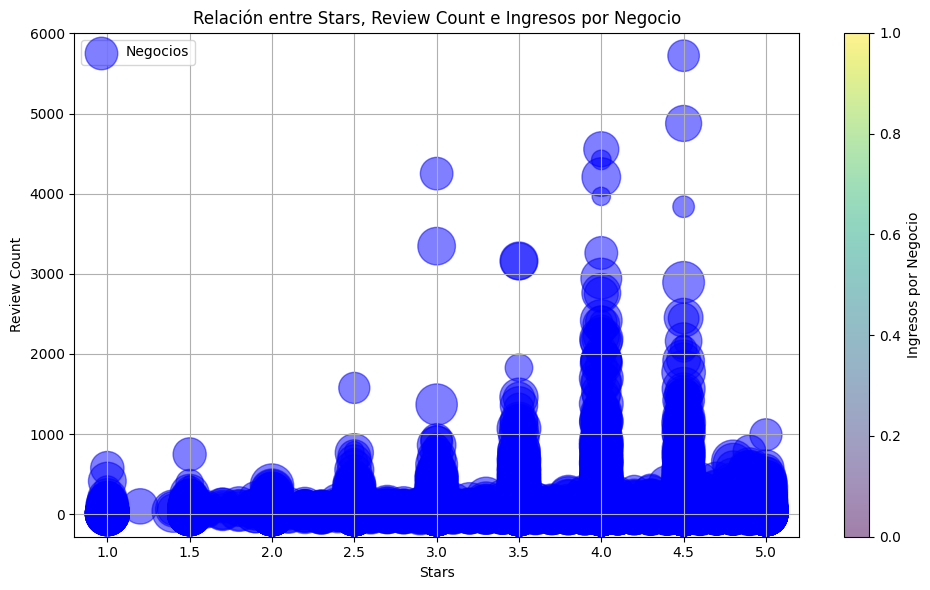

In [12]:
# Datos de las columnas
stars = Business_co['stars']
review_count = Business_co['review_count']
ingresos_por_negocio = Business_co['ingresos por negocio']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(stars, review_count, s=ingresos_por_negocio, alpha=0.5, c='blue', label='Negocios')

plt.title('Relación entre Stars, Review Count e Ingresos por Negocio')
plt.xlabel('Stars')
plt.ylabel('Review Count')
plt.colorbar(label='Ingresos por Negocio')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Seleccionar características y variable objetivo
X = Business_co[['stars', 'review_count', 'ingresos por negocio']]
y = Business_co['state']

# Imputar valores faltantes en X
imputer = SimpleImputer(strategy='mean')  # Puedes ajustar la estrategia según tus datos
X_imputed = imputer.fit_transform(X)

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f'Precisión en entrenamiento: {train_accuracy:.2f}')
print(f'Precisión en prueba: {test_accuracy:.2f}')

Precisión en entrenamiento: 0.77
Precisión en prueba: 0.77


In [14]:
def recommend_states_for_business(business_id, model, data):
    # Filtrar datos para obtener las características relevantes para el business_id
    business_data = Business_co[Business_co['business_id'] == business_id][['stars', 'review_count', 'ingresos por negocio']]
    
    if business_data.empty:
        raise ValueError(f'No se encontraron datos para el business_id: {business_id}')
    
    # Imputar valores faltantes si los hay
    imputer = SimpleImputer(strategy='mean')
    X_business = imputer.fit_transform(business_data)
    
    # Obtener el estado actual del negocio
    current_state = data[data['business_id'] == business_id]['state'].iloc[0]
    
    # Predecir probabilidades de estados usando el modelo
    predicted_probabilities = model.predict_proba(X_business.reshape(1, -1))
    
    # Obtener las etiquetas de clases del modelo
    classes = model.classes_
    
    # Ordenar las probabilidades y estados por probabilidad descendente, excluyendo el estado actual
    sorted_probabilities_indices = np.argsort(predicted_probabilities[0])[::-1]
    recommended_states = [classes[i] for i in sorted_probabilities_indices if classes[i] != current_state][:2]
    
    return recommended_states

In [15]:
# Ejemplo de uso:
business_id = 'jV_XOycEzSlTx-65W906pg'  # Reemplaza con el business_id de tu negocio
predicted_states = recommend_states_for_business(business_id, model, Business)

print(f'Recomendaciones de estados para el negocio {business_id}: {predicted_states}')

Recomendaciones de estados para el negocio jV_XOycEzSlTx-65W906pg: ['FL', 'PA']


In [17]:
Business_co.to_csv("Business.csv", index=False)

In [16]:
import joblib

# Exportar el modelo entrenado
joblib.dump(model, 'model.pkl')


['model.pkl']